In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df1 = pd.read_csv('zippedData/imdb.title.basics.csv.gz')
df2 = pd.read_csv('zippedData/imdb.name.basics.csv.gz') # match people's info with codes
df3 = pd.read_csv('zippedData/imdb.title.akas.csv.gz')
# df4 = pd.read_csv('zippedData/imdb.title.crew.csv.gz') # director and writer codes
df5 = pd.read_csv('zippedData/imdb.title.principals.csv.gz')
df6 = pd.read_csv('zippedData/imdb.title.ratings.csv.gz')
df7 = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
# df8 = pd.read_csv('zippedData/rt.movie_info.tsv.gz') # gives errors
# df9 = pd.read_csv('zippedData/rt.reviews.tsv.gz') # gives errors
df10 = pd.read_csv('zippedData/tmdb.movies.csv.gz')
df11 = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')

In [6]:
print('df1')
df1.info()
print('df2')
df2.info()
print('df3')
df3.info()
# print('df4')
# df4.info()
print('df5')
df5.info()
print('df6')
df6.info()
print('df7')
df7.info()
# print('df8')
# df8.info()
# print('df9')
# df9.info()
print('df10')
df10.info()
print('df11')
df11.info()


df1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
tconst             146144 non-null object
primary_title      146144 non-null object
original_title     146123 non-null object
start_year         146144 non-null int64
runtime_minutes    114405 non-null float64
genres             140736 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB
df2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606648 entries, 0 to 606647
Data columns (total 6 columns):
nconst                606648 non-null object
primary_name          606648 non-null object
birth_year            82736 non-null float64
death_year            6783 non-null float64
primary_profession    555308 non-null object
known_for_titles      576444 non-null object
dtypes: float64(2), object(4)
memory usage: 27.8+ MB
df3
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331703 entries, 0 to 331702
Data columns (total 8 columns):
title_id             3

In [32]:
df1 = df1.set_index('tconst')
df1

,primary_title,original_title,start_year,runtime_minutes,genres
tconst,,,,,
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...
tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy


In [33]:
df6.describe()

,averagerating,numvotes
count,73856.000000,7.385600e+04
mean,6.332729,3.523662e+03
std,1.474978,3.029402e+04
min,1.000000,5.000000e+00
25%,5.500000,1.400000e+01
50%,6.500000,4.900000e+01
75%,7.400000,2.820000e+02
max,10.000000,1.841066e+06


In [34]:
rating = df6.sort_values(by=['averagerating'], ascending=False).loc[df6['numvotes'] > 1000].set_index('tconst')
rating
# movies with more than 1000 ratings, sorted by highest rating.
# contains no null values!
# correlation between num votes and revenue?

,averagerating,numvotes
tconst,,
tt7131622,9.7,5600
tt4131686,9.6,1339
tt6058226,9.6,2604
tt5963218,9.5,6509
tt7738784,9.4,9629
...,...,...
tt9364684,1.4,3511
tt4404474,1.3,6249
tt8081062,1.3,3244


In [150]:
df5

,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"
...,...,...,...,...,...,...
1028181,tt9692684,1,nm0186469,actor,NaN,"[""Ebenezer Scrooge""]"
1028182,tt9692684,2,nm4929530,self,NaN,"[""Herself"",""Regan""]"
1028183,tt9692684,3,nm10441594,director,NaN,NaN
1028184,tt9692684,4,nm6009913,writer,writer,NaN


In [35]:
actors = df5.loc[df5['ordering'] == 1].set_index('nconst').drop(columns=['job', 'ordering']) \
.dropna(subset=['category'])
actors.isna().sum()

tconst            0
category          0
characters    46907
dtype: int64

In [36]:
title = df2.set_index('nconst')
title

,primary_name,birth_year,death_year,primary_profession,known_for_titles
nconst,,,,,
nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"
...,...,...,...,...,...
nm9990381,Susan Grobes,NaN,NaN,actress,NaN
nm9990690,Joo Yeon So,NaN,NaN,actress,"tt9090932,tt8737130"
nm9991320,Madeline Smith,NaN,NaN,actress,"tt8734436,tt9615610"


In [37]:
# Question: Does the gender of the main character affect movie rating?

j1 = actors.join(title, how='left').set_index('tconst').join(rating, how='right') \
.drop(columns=['primary_profession', 'known_for_titles', 'death_year', 'birth_year'])
j1 = j1.loc[(j1['category'] == 'actor') | (j1['category'] == 'actress')]


In [38]:
j3 = j1.loc[j1['category'] == 'actor']
j3

,category,characters,primary_name,averagerating,numvotes
tconst,,,,,
tt7131622,actor,"[""Rick Dalton""]",Leonardo DiCaprio,9.7,5600
tt6058226,actor,"[""Ekvtime Takaishvili""]",Rezo Chkhikvishvili,9.6,2604
tt5963218,actor,"[""King Walagamba""]",Uddika Premarathna,9.5,6509
tt7738784,actor,"[""Amudhavan""]",Mammootty,9.4,9629
tt5354160,actor,"[""Sharafat Karim Ayna""]",Chanchal Chowdhury,9.3,18470
...,...,...,...,...,...
tt4458206,actor,"[""Prime Minister of Turkey""]",Cem Kurtoglu,1.5,26723
tt4009460,actor,"[""Kirk""]",Kirk Cameron,1.5,14221
tt1557843,actor,"[""Medical Clinic Guard""]",Greg Anderson,1.4,1252


In [39]:
j4 = j1.loc[j1['category'] == 'actress']
j4

,category,characters,primary_name,averagerating,numvotes
tconst,,,,,
tt5593384,actress,"[""Krõõt""]",Maiken Schmidt,9.3,1220
tt7391996,actress,NaN,Radha Bessy,9.2,2195
tt5867800,actress,"[""Aruvi""]",Aditi Balan,8.8,8277
tt7710160,actress,"[""Barbi Brennan""]",Vera VanGuard,8.7,1015
tt7465992,actress,"[""Savitri""]",Keerthi Suresh,8.7,6917
...,...,...,...,...,...
tt2071491,actress,"[""Jill""]",Emanuelle Carriere,1.6,3697
tt7607940,actress,"[""Jasmeet""]",Parineeti Chopra,1.6,2087
tt6038600,actress,"[""Dziennikarka Nina""]",Beata Fido,1.4,7383


In [40]:
j2 = j1.join(df1, how='left')

In [41]:
j1

,category,characters,primary_name,averagerating,numvotes
tconst,,,,,
tt7131622,actor,"[""Rick Dalton""]",Leonardo DiCaprio,9.7,5600
tt6058226,actor,"[""Ekvtime Takaishvili""]",Rezo Chkhikvishvili,9.6,2604
tt5963218,actor,"[""King Walagamba""]",Uddika Premarathna,9.5,6509
tt7738784,actor,"[""Amudhavan""]",Mammootty,9.4,9629
tt5354160,actor,"[""Sharafat Karim Ayna""]",Chanchal Chowdhury,9.3,18470
...,...,...,...,...,...
tt1557843,actor,"[""Medical Clinic Guard""]",Greg Anderson,1.4,1252
tt9364684,actor,"[""Murat""]",Oguzhan Ugur,1.4,3511
tt4404474,actress,"[""Vivien""]",Joyce Ilg,1.3,6249


In [42]:
j2

,category,characters,primary_name,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
tconst,,,,,,,,,,
tt7131622,actor,"[""Rick Dalton""]",Leonardo DiCaprio,9.7,5600,Once Upon a Time ... in Hollywood,Once Upon a Time ... in Hollywood,2019,159.0,"Comedy,Drama"
tt6058226,actor,"[""Ekvtime Takaishvili""]",Rezo Chkhikvishvili,9.6,2604,Ekvtime: Man of God,Ekvtime: Man of God,2018,132.0,"Biography,Drama,History"
tt5963218,actor,"[""King Walagamba""]",Uddika Premarathna,9.5,6509,Aloko Udapadi,Aloko Udapadi,2017,113.0,"Drama,History"
tt7738784,actor,"[""Amudhavan""]",Mammootty,9.4,9629,Peranbu,Peranbu,2018,147.0,Drama
tt5354160,actor,"[""Sharafat Karim Ayna""]",Chanchal Chowdhury,9.3,18470,Aynabaji,Aynabaji,2016,147.0,"Crime,Mystery,Thriller"
...,...,...,...,...,...,...,...,...,...,...
tt1557843,actor,"[""Medical Clinic Guard""]",Greg Anderson,1.4,1252,Purge,Purge,2010,80.0,"Drama,Sci-Fi"
tt9364684,actor,"[""Murat""]",Oguzhan Ugur,1.4,3511,Borç Harç,Borç Harç,2019,90.0,Comedy
tt4404474,actress,"[""Vivien""]",Joyce Ilg,1.3,6249,Potato Salad,Kartoffelsalat,2015,81.0,"Comedy,Horror"


In [45]:
j2.category.value_counts(normalize=True)

actor      0.691767
actress    0.308233
Name: category, dtype: float64

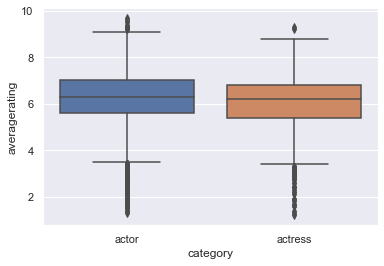

In [118]:
sns.boxplot(x=j1.category, y=j1.averagerating)

/Users/taejoon/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


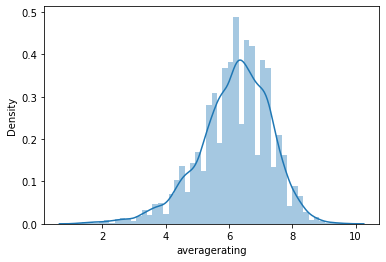

In [20]:
sns.distplot(j1.averagerating)

/Users/taejoon/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/taejoon/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


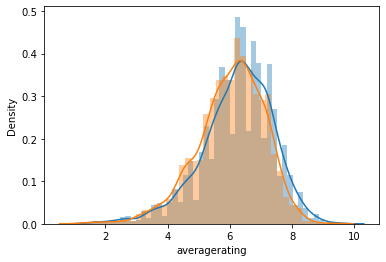

In [40]:
sns.distplot(j3.averagerating)
sns.distplot(j4.averagerating)

/Users/taejoon/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


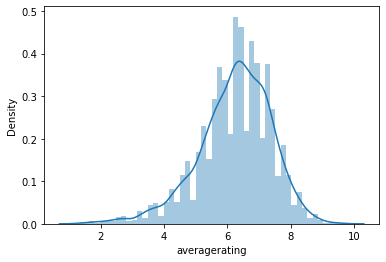

In [22]:
sns.distplot(j3.averagerating)

/Users/taejoon/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, 'Rating Distribution by Gender of Main Character')

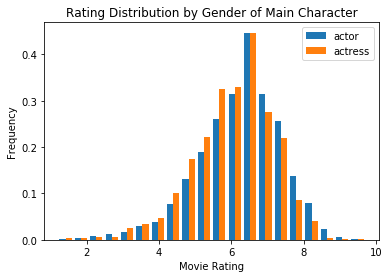

In [83]:
plt.hist([j3.averagerating, j4.averagerating], bins=20, density=True, label=['actor', 'actress'])
plt.legend()
plt.xlabel('Movie Rating')
plt.ylabel('Frequency')
plt.title('Rating Distribution by Gender of Main Character')

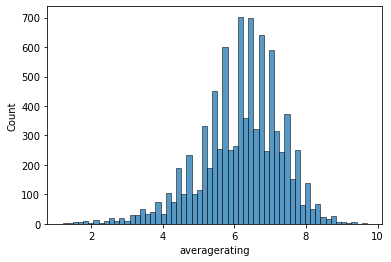

In [24]:
sns.histplot(j1.averagerating)

In [25]:
df7.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [26]:
df10.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [15]:
df11 # no null values

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,0
5778,79,"Apr 2, 1999",Following,6000,48482,240495
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0


In [49]:
df11

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009,Avatar,425000000,760507625,2776345279
1,2,2011,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,2019,Dark Phoenix,350000000,42762350,149762350
3,4,2015,Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,2017,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
...,...,...,...,...,...,...
5777,78,2018,Red 11,7000,0,0
5778,79,1999,Following,6000,48482,240495
5779,80,2005,Return to the Land of Wonders,5000,1338,1338
5780,81,2015,A Plague So Pleasant,1400,0,0


In [26]:
df12.describe()

,id,release_date,production_budget,domestic_gross,worldwide_gross
count,5180.000000,5180.000000,5.180000e+03,5.180000e+03,5.180000e+03
mean,50.334170,2007.328764,3.394279e+07,4.216872e+07,9.529960e+07
std,28.623821,6.801138,4.336466e+07,6.966039e+07,1.810321e+08
min,1.000000,1991.000000,1.100000e+03,0.000000e+00,0.000000e+00
25%,26.000000,2002.000000,5.575000e+06,1.023987e+06,3.463428e+06
50%,50.000000,2008.000000,2.000000e+07,1.694742e+07,2.936195e+07
75%,75.000000,2013.000000,4.500000e+07,5.294457e+07,1.022541e+08
max,100.000000,2020.000000,4.250000e+08,9.366622e+08,2.776345e+09


In [144]:
df12.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4719 entries, 0 to 5781
Data columns (total 6 columns):
id                   4719 non-null int64
release_date         4719 non-null int64
movie                4719 non-null object
production_budget    4719 non-null int64
domestic_gross       4719 non-null int64
worldwide_gross      4719 non-null int64
dtypes: int64(5), object(1)
memory usage: 258.1+ KB


In [149]:
df12.drop('movie',axis=1).groupby('production_budget').quantile(np.arange(0,1,.1)).head(20)

id  release_date  domestic_gross  worldwide_gross
production_budget                                                         
1100              0.0  82.0        2005.0        181041.0         181041.0
                  0.1  82.0        2005.0        181041.0         181041.0
                  0.2  82.0        2005.0        181041.0         181041.0
                  0.3  82.0        2005.0        181041.0         181041.0
                  0.4  82.0        2005.0        181041.0         181041.0
                  0.5  82.0        2005.0        181041.0         181041.0
                  0.6  82.0        2005.0        181041.0         181041.0
                  0.7  82.0        2005.0        181041.0         181041.0
                  0.8  82.0        2005.0        181041.0         181041.0
                  0.9  82.0        2005.0        181041.0         181041.0
1400              0.0  81.0        2015.0             0.0              0.0
                  0.1  81.0        2015.0             0.0              0.0
                  0.2  81.0        2015.0             0.0              0.0
                  0.3  81.0        2015.0             0.0              0.0
                  0.4  81.0        2015.0             0.0              0.0
                  0.5  81.0        2015.0             0.0              0.0
                  0.6  81.0        2015.0             0.0              0.0
                  0.7  81.0        2015.0             0.0              0.0
                  0.8  81.0        2015.0             0.0              0.0
                  0.9  81.0        2015.0             0.0              0.0

In [22]:
# df11.production_budget = df11.production_budget.map(lambda x: int(x[1:].replace(',', '')))
# df11.domestic_gross = df11.domestic_gross.map(lambda x: int(x[1:].replace(',', '')))
# df11.worldwide_gross = df11.worldwide_gross.map(lambda x: int(x[1:].replace(',', '')))
# df11.release_date = df11.release_date.map(lambda x: int(x[-4:]))

In [160]:
df11.production_budget = df11.production_budget.map(lambda x: x/100000)
df11.domestic_gross = df11.domestic_gross.map(lambda x: x/100000)
df11.worldwide_gross = df11.worldwide_gross.map(lambda x: x/100000)

TypeError: 'int' object is not subscriptable

In [161]:
df12 = df11.loc[df11['release_date'] >= 1998]

In [162]:
df13 = df12.loc[df12['production_budget'] > df12.production_budget.quantile(.75)]

In [163]:
df14 = df13.groupby(['release_date']).mean().drop([2020, 2019]).drop(['id'], axis=1)


''

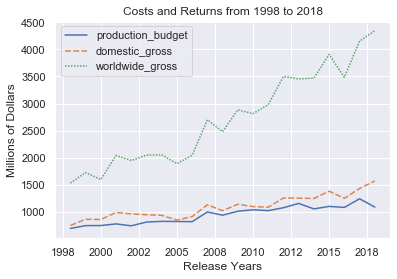

In [164]:
g = sns.lineplot(data=df14)
g.set_title('Costs and Returns from 1998 to 2018')
sns.set
xlabels = ['{0:.0f}'.format(x) for x in g.get_xticks()]
g.set_ylabel('Millions of Dollars')
g.set_xlabel('Release Years')
g.set_xticklabels(xlabels)
;

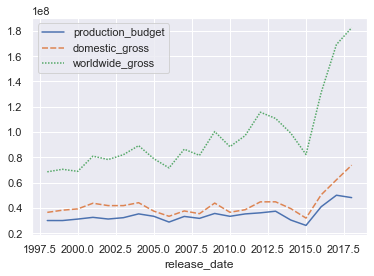

In [130]:
df15 = df12.groupby(['release_date']).mean().drop([2020, 2019]).drop(['id'], axis=1)
sns.lineplot(data=df15)

/Users/taejoon/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


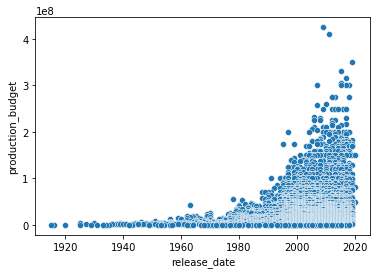

In [20]:
# How has the movie industry grow over the last n years?
# How has production budget and gross incomes changed over the years?
# Does an increase in budget necessarily yield higher gross incomes?
sns.scatterplot(df11.release_date, df11.production_budget)

/Users/taejoon/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


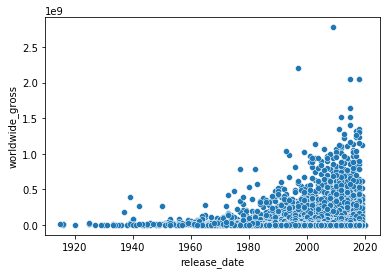

In [46]:
sns.scatterplot(df11.release_date, df11.worldwide_gross)

/Users/taejoon/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


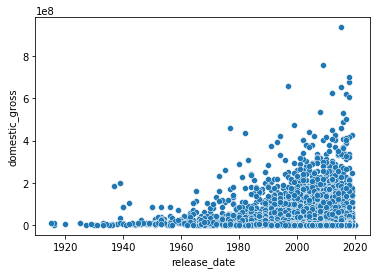

In [47]:
sns.scatterplot(df11.release_date, df11.domestic_gross)

/Users/taejoon/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


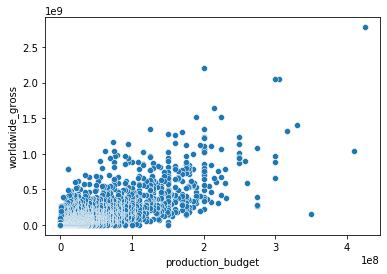

In [48]:
sns.scatterplot(df11.production_budget, df11.worldwide_gross)

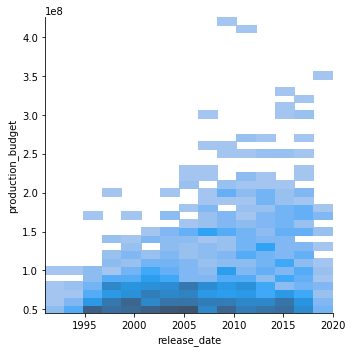

In [86]:
sns.displot(data=df13, x="release_date", y="production_budget")

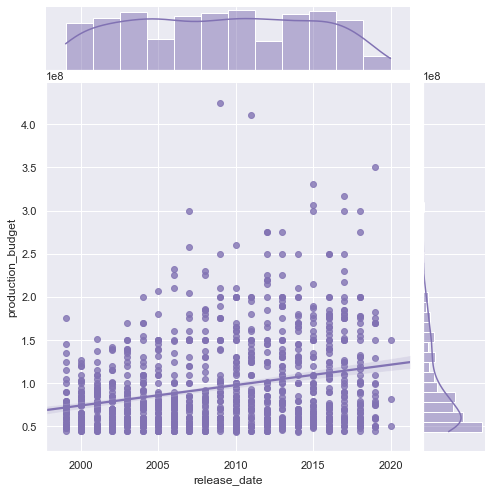

In [117]:
sns.set_theme(style="darkgrid")

g = sns.jointplot(x="release_date", y="production_budget", data=df13,
                  kind="reg", truncate=False,
                  color="m", height=7)

In [ ]:
df16 = df12.groupby(['release_date']).mean().drop([2020]).drop(['id'], axis=1)

/Users/taejoon/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


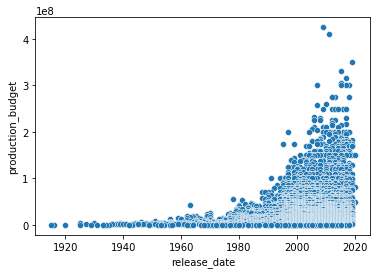

In [29]:
sns.scatterplot(df11.release_date, df11.production_budget)

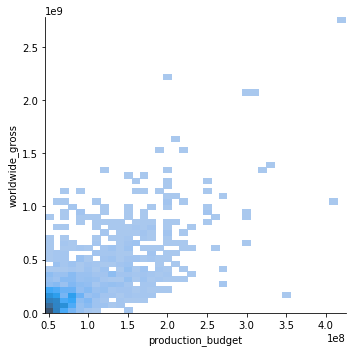

In [87]:
sns.displot(data=df13, x="production_budget", y="worldwide_gross")